# Przygotowanie danych

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plotly.offline import iplot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from IPython.display import display
df1 = pd.read_csv('/content/drive/MyDrive/df1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/df2.csv')

In [114]:
#typy df1
BusinessTravel_dict = {'Non-Travel':0, 'Travel_Rarely':1, 'Travel_Frequently':2}
df1['BusinessTravel']=df1['BusinessTravel'].map(BusinessTravel_dict)
Gender_dict = {'Male':0, 'Female':1}
df1['Gender']=df1['Gender'].map(Gender_dict)
Department_dict = {'Research & Development':0, 'Human Resources':1, 'Sales':2}
df1['Department']=df1['Department'].map(Department_dict)
EducationField_dict = {'Life Sciences':0, 'Medical':1, 'Other':2, 'Technical Degree':3, 'Marketing':4, 'Human Resources':5}
df1['EducationField']=df1['EducationField'].map(EducationField_dict)
JobRole_dict = {'Laboratory Technician':0, 'Manufacturing Director':1, 'Research Scientist':2, 'Human Resources':3, 'Research Director':4, 'Sales Representative':5,
                'Manager':6, 'Healthcare Representative':7, 'Sales Executive':8}
df1['JobRole']=df1['JobRole'].map(JobRole_dict)
MaritalStatus_dict = {'Married':0, 'Single':1, 'Divorced':2}
df1['MaritalStatus']=df1['MaritalStatus'].map(MaritalStatus_dict)

In [115]:
df1=df1.drop(['EmployeeCount'],axis=1) #tylko jedna wartość

In [116]:
sum(df2['Attrition'].isnull())

147

In [117]:
df2=df2.drop(['Over18'],axis=1) #usunięte, bo tylko jedna wartość
df2=df2.drop(['StandardHours'],axis=1)
df2=df2.dropna(subset=['Attrition']) #był problem z kolejnością kodu, ten musi być wcześnie

In [118]:
#typy df2
OverTime_dict = {'No':0, 'Yes':1}
df2['OverTime']=df2['OverTime'].map(OverTime_dict)
Attrition_dict = {'No':0, 'Yes':1}
df2['Attrition']=df2['Attrition'].map(Attrition_dict) #problem z Attrition, nie odpalać więcej niż raz

In [119]:
sum(df2['Attrition'].isnull())

0

In [120]:
df2.Attrition.unique()

array([0, 1])

In [121]:
df=pd.merge(df1, df2, on='EmployeeNumber', how='inner')

In [122]:
df=df.drop(['EmployeeNumber'],axis=1)

In [147]:
df = df[df['Age'] <= 100]
df=df[df['DistanceFromHome'] <=40000]
df=df[df['TotalWorkingYears']<= 100]
df=df[df['YearsWithCurrManager']<= 100]
df=df[df['YearsAtCompany']<= 100]
df=df[df['YearsInCurrentRole']<= 100]
df=df[df['YearsSinceLastPromotion']<= 100]

In [148]:
len(df)

2351

In [149]:
df.Attrition

0       0
1       0
2       0
3       0
4       0
       ..
4278    1
4279    1
4280    1
4284    1
4285    0
Name: Attrition, Length: 2351, dtype: int64

In [150]:
df.dtypes

Age                         float64
BusinessTravel                int64
DailyRate                   float64
Department                    int64
DistanceFromHome            float64
Education                   float64
EducationField                int64
EnvironmentSatisfaction     float64
Gender                        int64
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                       int64
JobSatisfaction             float64
MaritalStatus                 int64
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
OverTime                      int64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          

In [151]:
corr = df.corr()['Attrition']
corr

Age                        -0.059755
BusinessTravel              0.014699
DailyRate                  -0.022064
Department                  0.043040
DistanceFromHome            0.014490
Education                  -0.021709
EducationField              0.052065
EnvironmentSatisfaction    -0.042646
Gender                     -0.015308
HourlyRate                  0.012679
JobInvolvement             -0.032985
JobLevel                   -0.048632
JobRole                     0.010821
JobSatisfaction            -0.074422
MaritalStatus              -0.027089
MonthlyIncome              -0.041005
MonthlyRate                 0.000966
NumCompaniesWorked          0.011617
OverTime                    0.121132
PercentSalaryHike           0.001644
PerformanceRating          -0.010230
RelationshipSatisfaction   -0.007913
StockOptionLevel           -0.076996
TotalWorkingYears          -0.058398
TrainingTimesLastYear      -0.016068
WorkLifeBalance            -0.008047
YearsAtCompany             -0.028619
Y

In [152]:
correlation_matrix = df.corr()

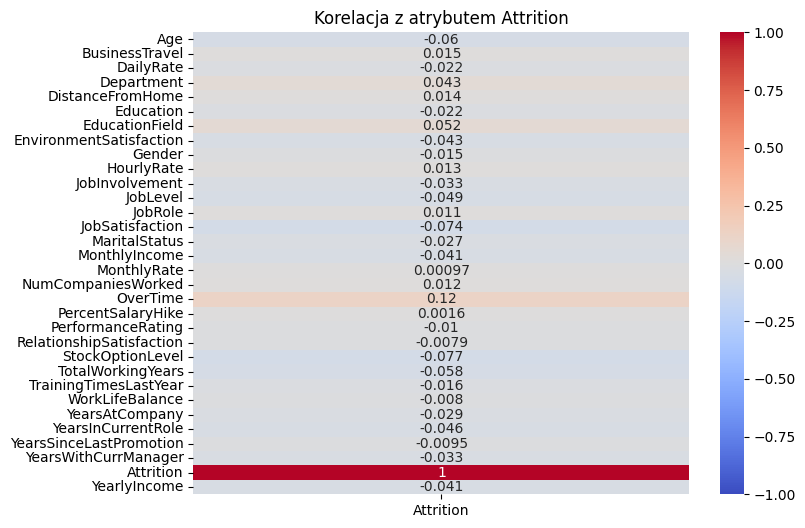

In [153]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['Attrition']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelacja z atrybutem Attrition')
plt.show()

# Regresja Logistyczna

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline

In [172]:
X = df[['OverTime', 'DistanceFromHome', 'Department']]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
print(X
    )

      OverTime
0            1
1            1
2            0
3            0
4            0
...        ...
4278         0
4279         0
4280         0
4284         1
4285         1

[2351 rows x 1 columns]


In [173]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [174]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [175]:
y_pred = model.predict(X_test_scaled)

In [176]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report_result}')

Accuracy: 0.6199575371549894
Confusion Matrix:
[[270  21]
 [158  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.93      0.75       291
           1       0.51      0.12      0.20       180

    accuracy                           0.62       471
   macro avg       0.57      0.53      0.47       471
weighted avg       0.59      0.62      0.54       471

